# **LUTFOR RAHMAN LIPU**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First i have imported all the mecessery lab and libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score 

Not i have imported the data base from my google drive.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/midtermfile ML/Automobile Dataset.csv')
df

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,-1,95,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,202,-1,95,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


general  information  about the database

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         205 non-null    int64  
 1   symboling          205 non-null    int64  
 2   normalized-losses  205 non-null    object 
 3   make               205 non-null    object 
 4   fuel-type          205 non-null    object 
 5   aspiration         205 non-null    object 
 6   num-of-doors       205 non-null    object 
 7   body-style         205 non-null    object 
 8   drive-wheels       205 non-null    object 
 9   engine-location    205 non-null    object 
 10  wheel-base         205 non-null    float64
 11  length             205 non-null    float64
 12  width              205 non-null    float64
 13  height             205 non-null    float64
 14  curb-weight        205 non-null    int64  
 15  engine-type        205 non-null    object 
 16  num-of-cylinders   205 non

In [ ]:
df.describe()

,Unnamed: 0,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,102.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,0.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,51.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,102.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,153.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,204.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


 now i  will replace all "?" string with Null data values, and replace the null values with the mean values of the corresponding columns. I will also simultaneously change the data types of all the columns that wher required.

In [ ]:
df.replace({"?": np.NaN}, inplace=True)

df.isna().any() 

Unnamed: 0           False
symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

Now i will find the total null value in each and every colum

In [ ]:
df.isna().sum()

Unnamed: 0            0
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
df.head(5)

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


 (Question 2)

Now i will  convert string numbers to integer/float numbers in the columns with quantative data type..

In [ ]:
# Changing datatype of columns:
df['normalized-losses'] = df['normalized-losses'].astype(float)
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)

In [ ]:
df['normalized-losses'].replace({np.NaN: df['normalized-losses'].mean()}, inplace=True)
df['bore'].replace({np.NaN: df['bore'].mean()}, inplace=True)
df['stroke'].replace({np.NaN: df['stroke'].mean()}, inplace=True)


df.isna().sum()

AS the columns: num-of-doors, horsepowers, peak-rpm are qualitative columns, we cannot  replace the Null values converting the data type to number types first without encoding.  So i need encode the columns, and replace the Null values with the mean, and change the data types of the columns.

In [ ]:
# encoding 'num-of-doors' column
print('Unique values in "num-of-doors" column before manual encoding:', df['num-of-doors'].unique())
df['num-of-doors'].replace({'two': 2, 'four': 4}, inplace=True)
print('Unique values in "num-of-doors" column after manual encoding:', df['num-of-doors'].unique())
print()
#  replacing Null values in 'num-of-doors' column with mean
print('NaN values before manual cleaning:', df['num-of-doors'].isna().sum())
df['num-of-doors'].replace({np.NaN: int(df['num-of-doors'].mean())}, inplace=True)
print('NaN values after manual cleaning:', df['num-of-doors'].isna().sum())
print()

df['num-of-doors'] = df['num-of-doors'].astype(int)

print('Final view of cleaned column "num-of-doors"')
print('===========================================')
print('Final unique values in "num-of-doors":', df['num-of-doors'].unique())
print('Final NaN values in "num-of-doors":', df['num-of-doors'].isna().sum())
print('Final data type of "num-of-doors":', df['num-of-doors'].dtype)

Unique values in "num-of-doors" column before manual encoding: ['two' 'four' nan]
Unique values in "num-of-doors" column after manual encoding: [ 2.  4. nan]

NaN values before manual cleaning: 2
NaN values after manual cleaning: 0

Final view of cleaned column "num-of-doors"
Final unique values in "num-of-doors": [2 4 3]
Final NaN values in "num-of-doors": 0
Final data type of "num-of-doors": int64


In [ ]:
# For 'horsepowers' column replacing NaN with '0' (string 0) for changing datatype
print('Unique values in "horsepower" column before manual encoding:', df['horsepower'].unique())
print('NaN values before manual cleaning:', df['horsepower'].isna().sum())
df['horsepower'].replace({np.NaN: '0'}, inplace=True)
print()

print('Initial data type of "horsepower":', df['horsepower'].dtype)
df['horsepower'] = df['horsepower'].astype(int)
print('Datatype of "horsepower" column after changing:', df['horsepower'].dtype)
print()

df['horsepower'].replace({0: int(df['horsepower'].mean())}, inplace=True)
print('Unique values in "horsepower" column after manual encoding & replacing Null values:', df['horsepower'].unique())
print()

print('Final view of cleaned column "horsepower"')
print('=========================================')
print('Final data type of "horsepower":', df['horsepower'].dtype)
print('Final NaN values in "horsepower":', df['horsepower'].isna().sum())
print('Final unique values in "horsepower":', df['horsepower'].unique())

Unique values in "horsepower" column before manual encoding: ['111' '154' '102' '115' '110' '140' '160' '101' '121' '182' '48' '70'
 '68' '88' '145' '58' '76' '60' '86' '100' '78' '90' '176' '262' '135'
 '84' '64' '120' '72' '123' '155' '184' '175' '116' '69' '55' '97' '152'
 '200' '95' '142' '143' '207' '288' nan '73' '82' '94' '62' '56' '112'
 '92' '161' '156' '52' '85' '114' '162' '134' '106']
NaN values before manual cleaning: 2

Initial data type of "horsepower": object
Datatype of "horsepower" column after changing: int64

Unique values in "horsepower" column after manual encoding & replacing Null values: [111 154 102 115 110 140 160 101 121 182  48  70  68  88 145  58  76  60
  86 100  78  90 176 262 135  84  64 120  72 123 155 184 175 116  69  55
  97 152 200  95 142 143 207 288 103  73  82  94  62  56 112  92 161 156
  52  85 114 162 134 106]

Final view of cleaned column "horsepower"
Final data type of "horsepower": int64
Final NaN values in "horsepower": 0
Final unique value

In [ ]:
# For 'peak-rpm' column replacing NaN with '0' (string 0) for changing datatype
print('Unique values in "peak-rpm" column before manual encoding:', df['peak-rpm'].unique())
print('NaN values before manual cleaning:', df['peak-rpm'].isna().sum())
df['peak-rpm'].replace({np.NaN: '0'}, inplace=True)
# print('Unique values in "peak-rpm" column after manual encoding:', df['peak-rpm'].unique())
print()

print('Initial data type of "peak-rpm":', df['peak-rpm'].dtype)
df['peak-rpm'] = df['peak-rpm'].astype(int)
print('Datatype of "peak-rpm" column after changing:', df['peak-rpm'].dtype)
print()

df['peak-rpm'].replace({0: int(df['peak-rpm'].mean())}, inplace=True)
print('Unique values in "peak-rpm" column after manual encoding & replacing Null values:', df['peak-rpm'].unique())
print()

print('Final view of cleaned column "peak-rpm"')
print('=======================================')
print('Final data type of "peak-rpm":', df['peak-rpm'].dtype)
print('Final NaN values in "peak-rpm":', df['peak-rpm'].isna().sum())
print('Final unique values in "peak-rpm":', df['peak-rpm'].unique())

Unique values in "peak-rpm" column before manual encoding: ['5000' '5500' '5800' '4250' '5400' '5100' '4800' '6000' '4750' '4650'
 '4200' '4350' '4500' '5200' '4150' '5600' '5900' '5750' nan '5250' '4900'
 '4400' '6600' '5300']
NaN values before manual cleaning: 2

Initial data type of "peak-rpm": object
Datatype of "peak-rpm" column after changing: int64

Unique values in "peak-rpm" column after manual encoding & replacing Null values: [5000 5500 5800 4250 5400 5100 4800 6000 4750 4650 4200 4350 4500 5200
 4150 5600 5900 5750 5075 5250 4900 4400 6600 5300]

Final view of cleaned column "peak-rpm"
Final data type of "peak-rpm": int64
Final NaN values in "peak-rpm": 0
Final unique values in "peak-rpm": [5000 5500 5800 4250 5400 5100 4800 6000 4750 4650 4200 4350 4500 5200
 4150 5600 5900 5750 5075 5250 4900 4400 6600 5300]



Unlike the other columns we cannot replace the null values in price column with the mean  because the price column will be the label (y value) for the linear regression model.That's why the price column cannot be altered at all, to have the pure integrety. As a result, for the rows where the price has null values, we have to simply delete the whole columns.

In [ ]:
# Data type of price column
print('Dataset Shape before deleting rown with missing price:', df.shape)
print('NaN values before manual cleaning:', df['price'].isna().sum())
print('Data type of price column:', df['price'].dtype)
print('Unique values in "price":', df['price'].unique())

print()
# Deleting price rows with null values
df.dropna(inplace=True)
# Setting datatype to int
df['price'] = df['price'].astype(int)
print('Final view of cleaned column "price"')
print('====================================')
print('Dataset Shape after deleting rown with missing price:', df.shape)
print('NaN values after manual cleaning:', df['price'].isna().sum())
print('Data type of price column:', df['price'].dtype)
print('Unique values in "price":', df['price'].unique())

Dataset Shape before deleting rown with missing price: (205, 27)
NaN values before manual cleaning: 4
Data type of price column: object
Unique values in "price": ['13495' '16500' '13950' '17450' '15250' '17710' '18920' '23875' nan
 '16430' '16925' '20970' '21105' '24565' '30760' '41315' '36880' '5151'
 '6295' '6575' '5572' '6377' '7957' '6229' '6692' '7609' '8558' '8921'
 '12964' '6479' '6855' '5399' '6529' '7129' '7295' '7895' '9095' '8845'
 '10295' '12945' '10345' '6785' '11048' '32250' '35550' '36000' '5195'
 '6095' '6795' '6695' '7395' '10945' '11845' '13645' '15645' '8495'
 '10595' '10245' '10795' '11245' '18280' '18344' '25552' '28248' '28176'
 '31600' '34184' '35056' '40960' '45400' '16503' '5389' '6189' '6669'
 '7689' '9959' '8499' '12629' '14869' '14489' '6989' '8189' '9279' '5499'
 '7099' '6649' '6849' '7349' '7299' '7799' '7499' '7999' '8249' '8949'
 '9549' '13499' '14399' '17199' '19699' '18399' '11900' '13200' '12440'
 '13860' '15580' '16900' '16695' '17075' '16630' '17950

Now that I have cleaned all the null values, and the set the proper data types

In [ ]:
print('Rows and columns of dataset:',df.shape)
df.isna().sum()

Rows and columns of dataset: (201, 27)


Unnamed: 0           0
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   symboling          201 non-null    int64  
 2   normalized-losses  201 non-null    float64
 3   make               201 non-null    object 
 4   fuel-type          201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    int64  
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

I will now do the same for the columns with no null values. But this time, as there is no null values, we can directly use scikit-learn's label encoder to automatically encode the remaining qualititive columns.

In [ ]:
# Making Label Encoder
label_encoder = preprocessing.LabelEncoder()


opjectTypes = []

print('Data type before encoding')
print('=========================')
for name in df.columns: 
  if df[name].dtype == 'object':
    opjectTypes.append(name)
    print(name + ':', df[name].dtype, '(eg.', df[name][0], ',', df[name][1], '),', 'Unique Values:', df[name].unique())
    df[name]= label_encoder.fit_transform(df[name])

print()
print('Data type after encoding')
print('========================')
for items in opjectTypes:
  print(items + ':', df[items].dtype, '(eg.', df[items][0], ',', df[items][3], '),', 'Unique Values:', df[items].unique())

Data type before encoding
make: object (eg. alfa-romero , alfa-romero ), Unique Values: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type: object (eg. gas , gas ), Unique Values: ['gas' 'diesel']
aspiration: object (eg. std , std ), Unique Values: ['std' 'turbo']
body-style: object (eg. convertible , convertible ), Unique Values: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels: object (eg. rwd , rwd ), Unique Values: ['rwd' 'fwd' '4wd']
engine-location: object (eg. front , front ), Unique Values: ['front' 'rear']
engine-type: object (eg. dohc , dohc ), Unique Values: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
num-of-cylinders: object (eg. four , four ), Unique Values: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuel-system: object (eg. mpfi , mpfi ), Unique Values: ['mpfi' '2bbl' 'mfi

Question 3:


 i am now ready to fully prepared  to find the corelated fearures of the 'price' column.

In [ ]:
print('Correlation "price" column with:')
print('================================')
for name in df.columns:
  print(name, ':', df[name].corr(df['price']))

Correlation "price" column with:
Unnamed: 0 : -0.11788883559113585
symboling : -0.0823911871696236
normalized-losses : 0.1339987342927433
make : -0.1636463329630027
fuel-type : -0.11032556467564833
aspiration : 0.17957848135197432
num-of-doors : 0.047086723200650916
body-style : -0.07293257127569965
drive-wheels : 0.5883330641805211
engine-location : 0.3310618670099157
wheel-base : 0.5846418222655086
length : 0.6906283804483648
width : 0.7512653440522669
height : 0.13548630756805982
curb-weight : 0.8344145257702834
engine-type : 0.12602453769256064
num-of-cylinders : 0.005509331879366835
engine-size : 0.8723351674455198
fuel-system : 0.5216890829532035
bore : 0.5431553832626611
stroke : 0.0822692885532582
compression-ratio : 0.07110732668194136
horsepower : 0.8097290352560285
peak-rpm : -0.10113319232210531
city-mpg : -0.686571006784468
highway-mpg : -0.704692265058953
price : 1.0


In [ ]:

cor = df.corr()
cor

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
Unnamed: 0,1.000000,-0.161862,-2.410335e-01,0.989205,-0.122076,0.082694,0.184871,0.100104,0.025390,5.020432e-02,...,-0.046752,0.203239,0.246473,-0.162926,0.144770,-0.022590,-0.198914,0.027644,0.020049,-0.117889
symboling,-0.161862,1.000000,4.662638e-01,-0.129645,0.196735,-0.054615,-0.672074,-0.600333,-0.053056,2.123389e-01,...,-0.110581,0.091601,-0.140019,-0.008153,-0.182196,0.075776,0.279595,-0.035527,0.036233,-0.082391
normalized-losses,-0.241034,0.466264,1.000000e+00,-0.254356,0.101546,-0.006911,-0.366810,-0.251775,0.317214,9.412733e-17,...,0.112360,0.230311,-0.029862,0.055045,-0.114713,0.217300,0.239534,-0.225016,-0.181877,0.133999
make,0.989205,-0.129645,-2.543563e-01,1.000000,-0.109330,0.071254,0.156902,0.090621,-0.034844,5.331188e-02,...,-0.084770,0.144769,0.236814,-0.203691,0.132554,-0.064661,-0.213527,0.065761,0.059111,-0.163646
fuel-type,-0.122076,0.196735,1.015463e-01,-0.109330,1.000000,-0.408228,-0.173866,-0.147654,-0.131096,4.091700e-02,...,-0.070779,0.042824,-0.054458,-0.241064,-0.985231,0.168941,0.475445,-0.265676,-0.198690,-0.110326
aspiration,0.082694,-0.054615,-6.910980e-03,0.071254,-0.408228,1.000000,0.054803,0.072079,0.094469,-5.749596e-02,...,0.110040,0.282269,0.227816,0.218233,0.307522,0.251284,-0.189559,-0.189237,-0.241851,0.179578
num-of-doors,0.184871,-0.672074,-3.668103e-01,0.156902,-0.173866,0.054803,1.000000,0.686597,-0.110223,-1.416226e-01,...,0.028293,-0.002475,0.124217,-0.011962,0.157192,-0.097698,-0.231854,-0.035312,-0.053844,0.047087
body-style,0.100104,-0.600333,-2.517751e-01,0.090621,-0.147654,0.072079,0.686597,1.000000,-0.161004,-2.783504e-01,...,-0.063692,-0.054810,0.021233,-0.013401,0.134622,-0.136622,-0.106176,0.014217,-0.021328,-0.072933
drive-wheels,0.025390,-0.053056,3.172142e-01,-0.034844,-0.131096,0.094469,-0.110223,-0.161004,1.000000,1.493687e-01,...,0.526027,0.435926,0.471838,0.078738,0.120125,0.546097,-0.035126,-0.469240,-0.472893,0.588333
engine-location,0.050204,0.212339,9.412733e-17,0.053312,0.040917,-0.057496,-0.141623,-0.278350,0.149369,1.000000e+00,...,0.199367,0.106735,0.188413,-0.139339,-0.020467,0.342159,0.202038,-0.157132,-0.102964,0.331062


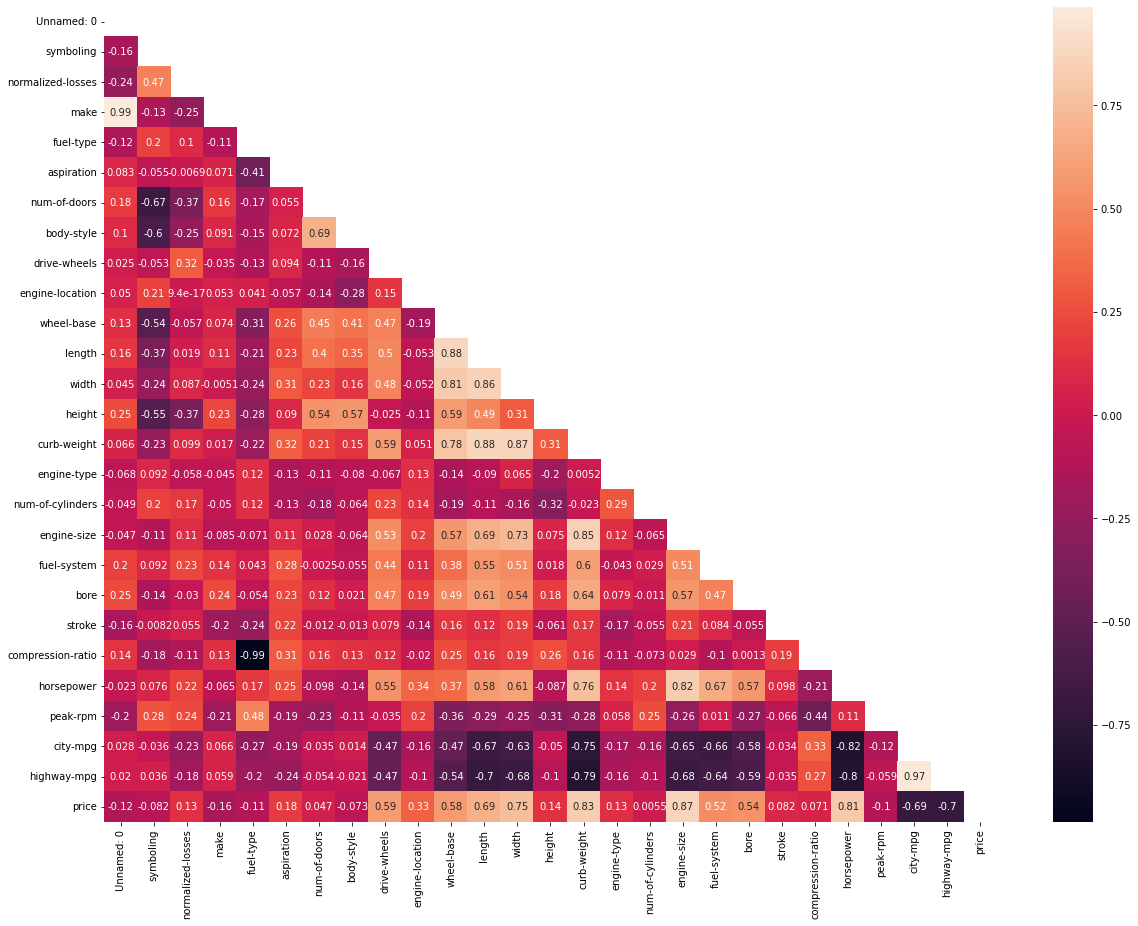

In [ ]:
# Plotting a heatmap of the correlation matrix
f, ax = plt.subplots(figsize=(20, 15))
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, annot=True, mask = mask)

 The correlation matrix and the heatmap, I can conclude that there are only a handful of featured that have high correlation with the price column .

In [ ]:

HighCorr = []

print('High correlation with Price:')
print('============================')
for name in df.columns:
  corre = df[name].corr(df['price'])
  if corre >= 0.5 and corre < 1: 
    HighCorr.append(name)
    print(name, ':', corre)

print()
print('Total number of feature with high correlation:', len(HighCorr))

High correlation with Price:
drive-wheels : 0.5883330641805211
wheel-base : 0.5846418222655086
length : 0.6906283804483648
width : 0.7512653440522669
curb-weight : 0.8344145257702834
engine-size : 0.8723351674455198
fuel-system : 0.5216890829532035
bore : 0.5431553832626611
horsepower : 0.8097290352560285

Total number of feature with high correlation: 9


Questio 4 and Question 5 


I will build the linear regression model using each of the columns against the price label to predict prices.

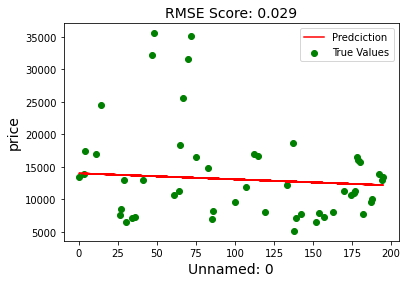

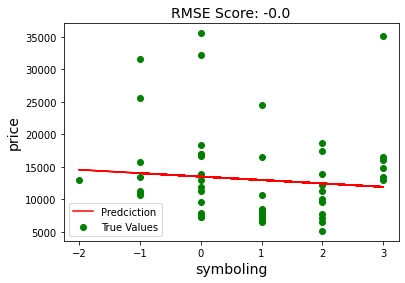

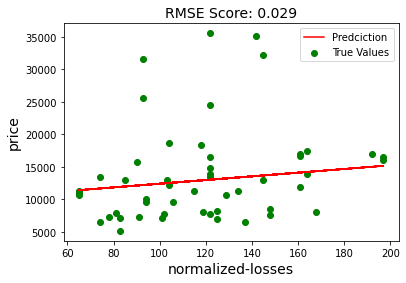

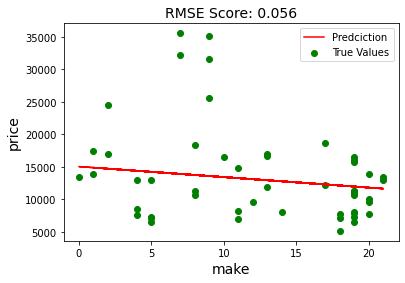

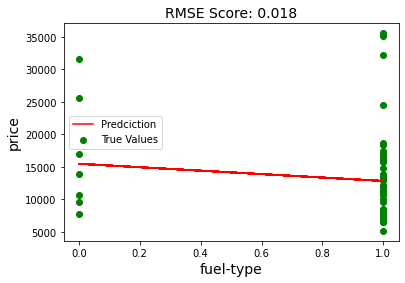

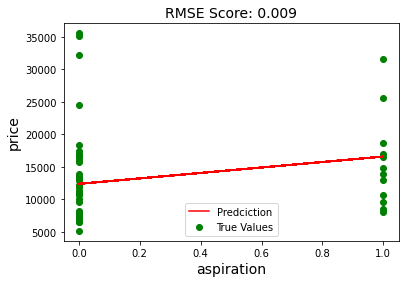

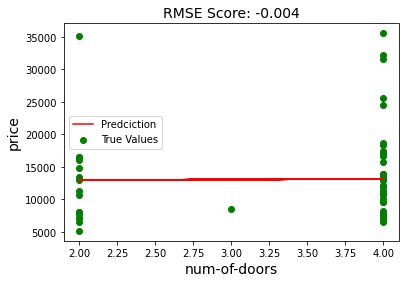

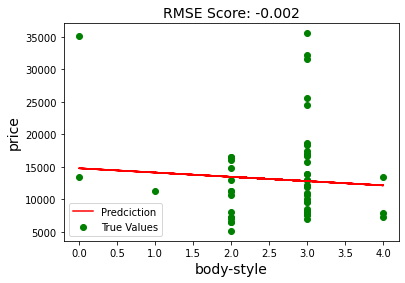

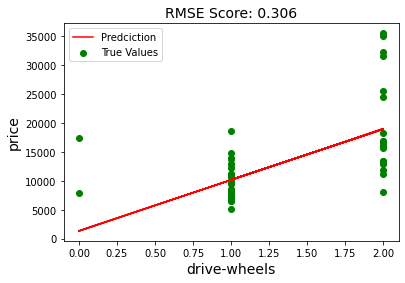

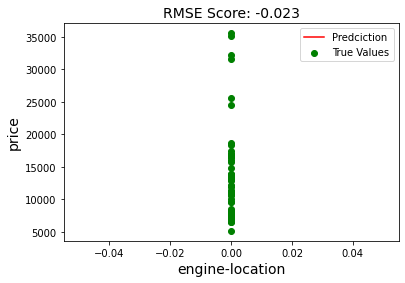

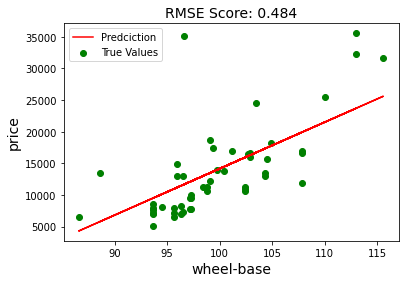

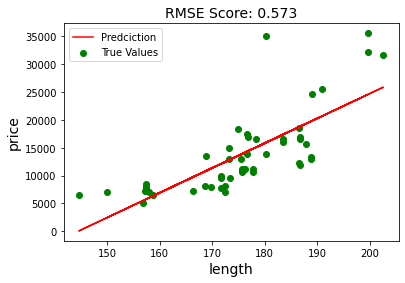

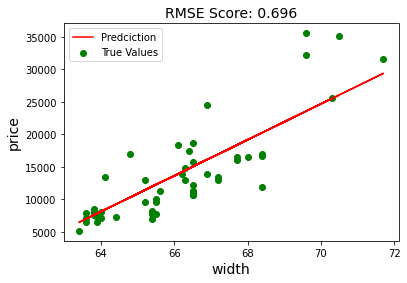

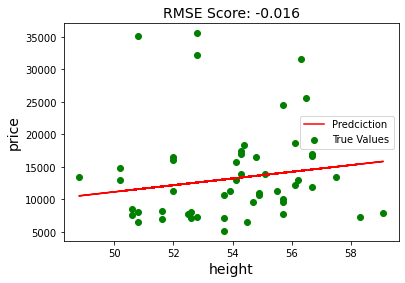

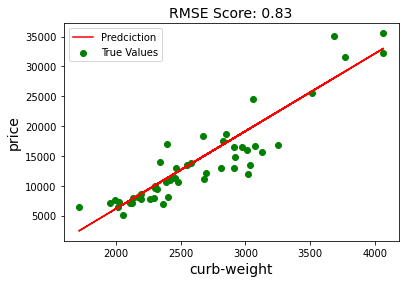

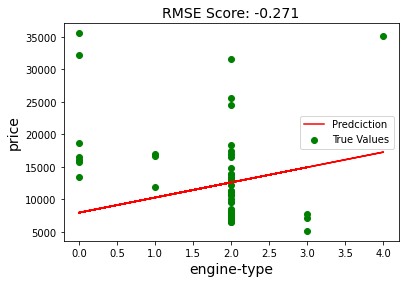

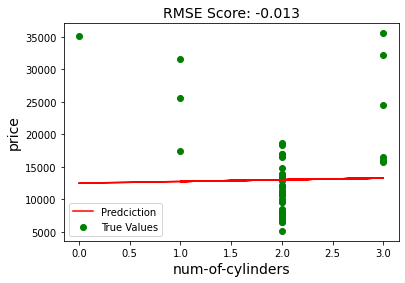

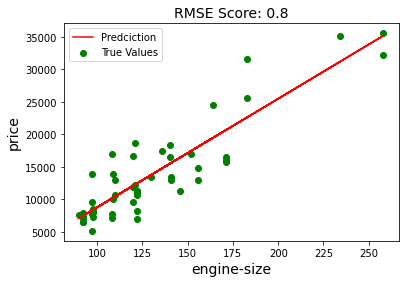

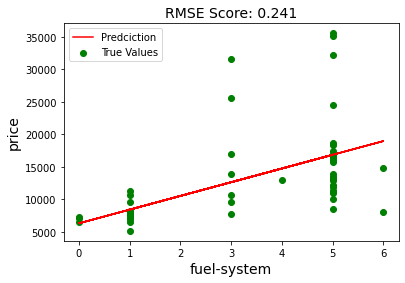

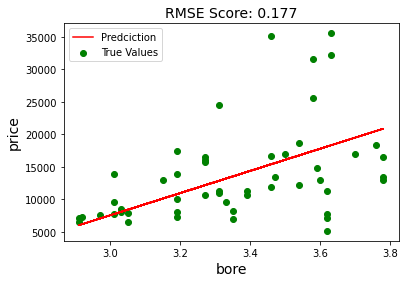

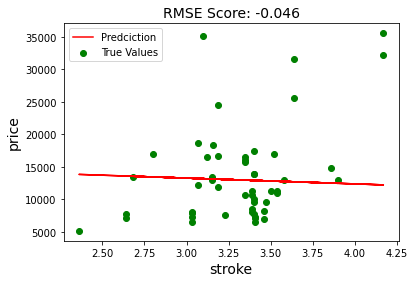

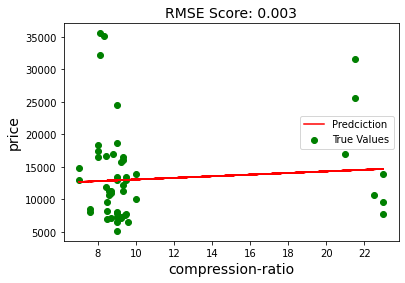

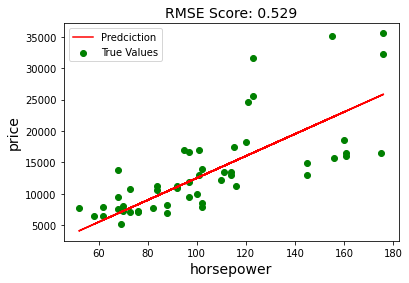

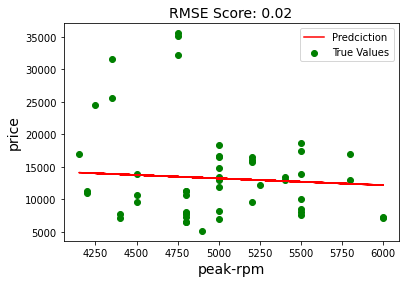

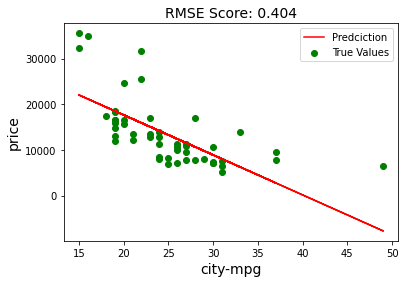

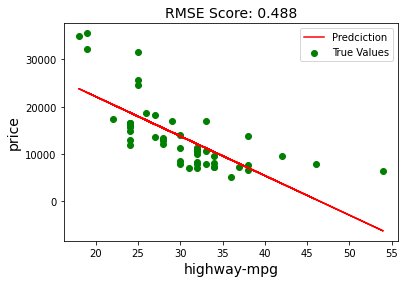

In [ ]:
# Making the regression function
regr = LinearRegression()

# Dropping the price column
dff = df.drop(columns=['price'])

for name in dff.columns:
  X = np.array(dff[name]).reshape(-1, 1)
  y = df['price']

  # Splitting the data into training and testing parts
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)

  
  regr.fit(X_train, y_train)
  
  y_pred = regr.predict(X_test)

  
  r2 = round((r2_score(y_test, y_pred)), 3)
  plt.scatter(X_test, y_test, color ='green') 
  plt.plot(X_test, y_pred, color ='red') 
  plt.title('RMSE Score: ' + str(r2), fontsize=14) 
  plt.xlabel(name, fontsize=14)
  plt.ylabel('price', fontsize=14)
  plt.legend(["Predciction", "True Values"])
  plt.show()
  print()

Now we can see from the graph plots above, the best features to predict the parice are the curb-weight (RMSE score 0.83), and engine-size (RMSE score 0.8). Since they have a score difference of just 3%, its within the margin of uncertainty.

In [ ]:

X = np.array(dff['curb-weight']).reshape(-1, 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)
# Training the model with traning data
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

r2 = round((r2_score(y_test, y_pred)), 3)
plt.figure(figsize=(15,10))
plt.scatter(X_test, y_test, color ='green') 
plt.plot(X_test, y_pred, color ='red') 
plt.title('RMSE Score: ' + str(r2), fontsize=20) 
plt.xlabel('curb-weight', fontsize=18)
plt.ylabel('price', fontsize=18)
plt.legend(["Predciction", "True Values"])
plt.show()

ValueError: ignored

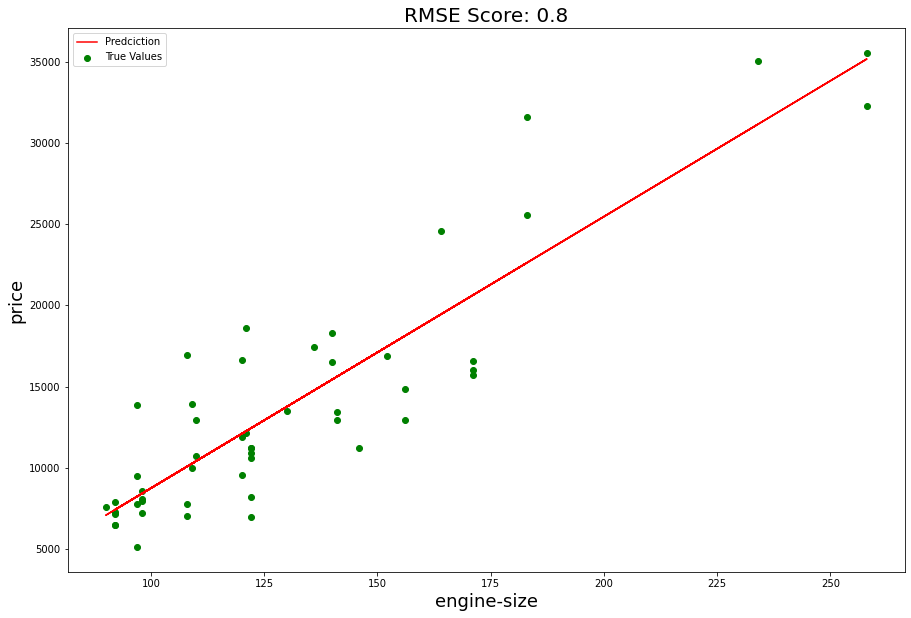

In [ ]:

X = np.array(dff['engine-size']).reshape(-1, 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)
# Training the model with traning data
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

r2 = round((r2_score(y_test, y_pred)), 3)
plt.figure(figsize=(15,10))
plt.scatter(X_test, y_test, color ='green') 
plt.plot(X_test, y_pred, color ='red') 
plt.title('RMSE Score: ' + str(r2), fontsize=20) 
plt.xlabel('engine-size', fontsize=18)
plt.ylabel('price', fontsize=18)
plt.legend(["Predciction", "True Values"])
plt.show()